<a href="https://colab.research.google.com/github/narendra974/AIMLOPS_IISC/blob/main/Capstone_Interim_English_German_Translation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
!pip install pycld2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 39.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904063 sha256=4760e687f47fa2e7c861ed63e3d64d79c7c88042ac1c2c16c2d5047e002cc0c3
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import pycld2 as cld2
import spacy
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
nltk.download('wordnet')
!python -m spacy download de_core_news_sm
gernlp = spacy.load('de_core_news_sm')
engnlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package wordnet to /root/nltk_data...


2023-12-03 17:23:13.474022: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 17:23:13.474079: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 17:23:13.474115: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 17:23:15.410619: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 64.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [ ]:
basefolder = "/content/drive/MyDrive/Greatlearning/Capstone/Dataset/"
germanfiles = ["commoncrawl_de_en.txt","europarl-v7_de_en.txt","news-commentary-v9_de_en.txt"]
engfiles = ["commoncrawl_en_de.txt","europarl-v7_en_de.txt","news-commentary-v9_en_de.txt"]

### Useful functions for Preprocessing of data

In [ ]:
import regex as re

def removestop(text,stopwords):
  raw = text.split()
  words = [word for word in raw if not word in stopwords]
  cleanwords = ' '.join(words)
  return cleanwords

def tolower(text):
  return text.lower()

def removespecial(text):
  te1 = re.sub("\s+"," ",text)
  te2 = re.sub('\n', '', te1)
  te3 = re.sub('\r', '', te2)
  te4 = re.sub("[0-9]","",te3)
  te5 = re.sub("()@%^&*-_,/\{}[?|$|.|!]","",te4)
  te6 = re.sub(r"[\p{Cc}\p{Cs}]+","",te5)
  te7 = re.sub(r'[^\w\s]','', te6)
  te8 = re.sub("[^a-zA-Z ]","",te7)
  return te7

def removeurl(text):
  return re.sub('https?://\S+|www\.\S+', '', text)

def clean_text(text):
    text = text.lower()
    pattern = re.compile(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?")
    text = re.sub(pattern,' ',text).strip()
    return text

## Function to read files

In [ ]:
def read_files(fileloc, language):
  with open(fileloc,"rb") as f:
    f_lines = f.readlines()
  df = pd.DataFrame(f_lines)
  dfc = df.set_axis([language],axis=1)
  dfc[language] = dfc[language].str.decode("utf-8")
  return dfc

In [ ]:
dfappend=pd.DataFrame()
for efile in range(len(germanfiles)):
  germanfilepath = basefolder+germanfiles[efile]
  print(germanfilepath)
  germandff = read_files(germanfilepath,"german")
  engfilepath = basefolder+engfiles[efile]
  engdff = read_files(engfilepath,"english")
  print(germandff.shape)
  print(engdff.shape)
  dfconcat = pd.concat([germandff, engdff],axis="columns")
  dfappend=pd.concat([dfappend, dfconcat])


/content/drive/MyDrive/Greatlearning/Capstone/Dataset/commoncrawl_de_en.txt
(2399123, 1)
(2399123, 1)
/content/drive/MyDrive/Greatlearning/Capstone/Dataset/europarl-v7_de_en.txt
(1920209, 1)
(1920209, 1)
/content/drive/MyDrive/Greatlearning/Capstone/Dataset/news-commentary-v9_de_en.txt
(201288, 1)
(201288, 1)


In [ ]:
dfappend.shape

(4520620, 2)

In [ ]:
dfappend.head()

,german,english
0,"iron cement ist eine gebrauchs-fertige Paste, ...",iron cement is a ready for use paste which is ...
1,Nach der Aushärtung schützt iron cement die Ko...,iron cement protects the ingot against the hot...
2,feuerfester Reparaturkitt für Feuerungsanlagen...,"a fire restant repair cement for fire places, ..."
3,Der Bau und die Reparatur der Autostraßen...\n,Construction and repair of highways and...\n
4,die Mitteilungen sollen den geschäftlichen kom...,An announcement must be commercial character.\n


## Observatory Analytics

In [ ]:
dfappend.isna().sum()

german     0
english    0
dtype: int64

In [ ]:
dfappend.duplicated().sum()

45510

45,510 duplicate records found.

### Dedupe records

In [ ]:
dfappend.drop_duplicates(subset=None, keep='first', inplace=True)
dfappend.shape

(4475110, 2)

###Take limited records due to computational limitations for the excercise

In [ ]:
dfappend["engcount"]=dfappend['english'].str.split().str.len()

In [ ]:
dfappend["engcount"].describe()

count    4.475110e+06
mean     2.311460e+01
std      1.497657e+01
min      0.000000e+00
25%      1.300000e+01
50%      2.000000e+01
75%      2.900000e+01
max      4.225000e+03
Name: engcount, dtype: float64

### As we see, we identify that 25-75 percentile of data has length of 13 to 29 words. We will exclude anything line that has less than 13 or greater than 29 words in the sentence

In [ ]:
 dfappendfil = dfappend[(dfappend.engcount >= 13) & (dfappend.engcount <= 29)]

In [ ]:
dfappendfil.count()


german      2411725
english     2411725
engcount    2411725
dtype: int64

### Record count reduced from 4475110 to 2411725. This is about 46% reduction in the data

### Stop word Removal - German & English

In [ ]:
german_stop_words = stopwords.words('german')
english_stop_words = stopwords.words('english')

In [ ]:
n=10000
dfsample = dfappendfil.sample(n=10000)

In [ ]:
dfsample['english_clean'] = dfsample['english'].apply(lambda x: removestop(x,english_stop_words))

In [ ]:
dfsample['german_clean'] = dfsample['german'].apply(lambda x: removestop(x,german_stop_words))

### Remove special characters/ Lower case

In [ ]:
dfsample['german_clean'] = dfsample['german_clean'].apply(lambda x: removespecial(x))
dfsample['english_clean'] = dfsample['english_clean'].apply(lambda x: removespecial(x))


In [ ]:
display(dfsample)

,german,english,engcount,english_clean,german_clean
1831261,Wegen ihrer Größe und Preise dienen sie aussch...,Due to the price and dimensions they are only ...,22,"Due price dimensions used Police , hospitals c...",Wegen Größe Preise dienen ausschließlich stati...
1251533,Auf den winkeligen Fluren und in den Sälen der...,The location of the caves - under the Buda Cas...,17,The location caves - Buda Castle Hill - unique...,"Auf winkeligen Fluren Sälen Höhlen, Budaer Bur..."
1822505,"Beschreibung von Design, Aussenform, Tragbarke...","Description of the design, of outer form and n...",16,"Description design, outer form novelty well pu...","Beschreibung Design, Aussenform, Tragbarkeit s..."
456825,"Herr Präsident, man reagiert sehr leicht auf E...","Mr President, it is very easy to react on emot...",23,"Mr President, easy react emotion House react e...","Herr Präsident, reagiert leicht Emotionen, Hoh..."
565445,"Er wollte wissen, ob ein einziger Mitgliedstaa...",He asked whether a single Member State might r...,23,He asked whether single Member State might req...,"Er wissen, einziger Mitgliedstaat Aussetzung v..."
...,...,...,...,...,...
100970,"Frau Präsidentin, mir wird man wohl nicht nach...","Madam President, I am one of those who were mo...",18,"Madam President, I one opposed away Friday sit...","Frau Präsidentin, wohl nachsagen können, Befür..."
1035633,Der vorliegende Bericht wird aus meiner Sicht ...,I believe that this report will lead to better...,23,I believe report lead better monitoring water ...,Der vorliegende Bericht Sicht besseren Überprü...
1065551,"Erstens garantiert die Kommission, dass die zu...","Firstly, the Commission ensures that the compe...",28,"Firstly, Commission ensures competent authorit...","Erstens garantiert Kommission, zuständigen Beh..."
697348,"Il est situé a deux pas de Notre Dame, des qua...","in front of the Cluny Abbey, right at the hear...",18,"front Cluny Abbey, right heart Paris's cultura...","Il est situé a deux pas de Notre Dame, quais e..."


### On closer analysis of data it is  found that the german text has english in it. We need to remove those rows.

### We will be using "Pycld2" python library for this

In [ ]:
def langdet(x):
  isReliable, textBytesFound, details = cld2.detect(x)

  return(details[0][1])

In [ ]:
dfsample['is_eng'] = dfsample['english_clean'].apply(lambda x: langdet(x))

In [ ]:
dfsample['is_ger'] = dfsample['german_clean'].apply(lambda x: langdet(x))

In [ ]:
display(dfsample["is_ger"].value_counts())

de    9429
en     261
un     205
fr      33
es      18
it       7
nl       5
pt       5
pl       4
hr       4
gl       3
da       3
id       2
ca       2
ru       2
lb       2
bs       2
ro       2
eo       1
tr       1
fy       1
sk       1
no       1
fi       1
cs       1
uk       1
sv       1
la       1
na       1
Name: is_ger, dtype: int64

In [ ]:
display(dfsample["is_eng"].value_counts())

en    9790
un      71
de      46
es      21
fr      19
it       9
pt       6
nl       6
ru       4
ca       3
da       3
sv       3
bs       2
id       2
pl       2
hr       2
ro       2
fi       1
gl       1
sr       1
no       1
tr       1
sk       1
la       1
cs       1
vi       1
Name: is_eng, dtype: int64

### We can see that some lines are 'un' unidentifiables and some are from other languages. We are going to kick out these records

In [ ]:
dfappendclean = dfsample[(dfsample.is_eng == 'en') & (dfsample.is_ger =='de')]

In [ ]:
dfappendclean.shape

(9323, 7)

In [ ]:
display(dfappendclean)

,german,english,engcount,english_clean,german_clean,is_eng,is_ger
1831261,Wegen ihrer Größe und Preise dienen sie aussch...,Due to the price and dimensions they are only ...,22,"Due price dimensions used Police , hospitals c...",Wegen Größe Preise dienen ausschließlich stati...,en,de
1251533,Auf den winkeligen Fluren und in den Sälen der...,The location of the caves - under the Buda Cas...,17,The location caves - Buda Castle Hill - unique...,"Auf winkeligen Fluren Sälen Höhlen, Budaer Bur...",en,de
1822505,"Beschreibung von Design, Aussenform, Tragbarke...","Description of the design, of outer form and n...",16,"Description design, outer form novelty well pu...","Beschreibung Design, Aussenform, Tragbarkeit s...",en,de
456825,"Herr Präsident, man reagiert sehr leicht auf E...","Mr President, it is very easy to react on emot...",23,"Mr President, easy react emotion House react e...","Herr Präsident, reagiert leicht Emotionen, Hoh...",en,de
565445,"Er wollte wissen, ob ein einziger Mitgliedstaa...",He asked whether a single Member State might r...,23,He asked whether single Member State might req...,"Er wissen, einziger Mitgliedstaat Aussetzung v...",en,de
...,...,...,...,...,...,...,...
842546,"Geschieht das nicht, dann müssen wir unverzügl...","If this does not happen, we have to immediatel...",19,"If happen, immediately stop delivering kind in...","Geschieht nicht, müssen unverzüglich aufhören,...",en,de
100970,"Frau Präsidentin, mir wird man wohl nicht nach...","Madam President, I am one of those who were mo...",18,"Madam President, I one opposed away Friday sit...","Frau Präsidentin, wohl nachsagen können, Befür...",en,de
1035633,Der vorliegende Bericht wird aus meiner Sicht ...,I believe that this report will lead to better...,23,I believe report lead better monitoring water ...,Der vorliegende Bericht Sicht besseren Überprü...,en,de
1065551,"Erstens garantiert die Kommission, dass die zu...","Firstly, the Commission ensures that the compe...",28,"Firstly, Commission ensures competent authorit...","Erstens garantiert Kommission, zuständigen Beh...",en,de


#NLP pre processing

1. Tokenization

2. Stemming

3. Tokenization of Stemmed output

4. Lamentization

In [ ]:
se = SnowballStemmer("english")
sg = SnowballStemmer("german")

def tokenize(text):
  token = word_tokenize(text)
  return token

def engstem(token):
    #t = x.strip().split()
    ret = [se.stem(word) for word in token]
    ret = ' '.join(ret)
    return ret

def gerstem(token):
    #t = x.strip().split()
    ret = [sg.stem(word) for word in token]
    ret = ' '.join(ret)
    return ret

def gerlemmatizer(x):
  ret = gernlp(x)
  return str(ret)

def englemmatizer(x):
  ret = engnlp(x)
  return str(ret)



### Normalization pipeline

In [ ]:
def engish_normalization_pipeline(text):
  token = tokenize(text)
  s = engstem(token)
  return englemmatizer(s)

def german_normalization_pipeline(text):
  token = tokenize(text)
  s = gerstem(token)
  return gerlemmatizer(s)

In [ ]:
dfappendclean.columns

Index(['german', 'english', 'engcount', 'english_clean', 'german_clean',
       'is_eng', 'is_ger'],
      dtype='object')

In [ ]:
dfnormal = dfappendclean[["english_clean", "german_clean"]]

In [ ]:
display(dfnormal)

,english_clean,german_clean
1831261,"Due price dimensions used Police , hospitals c...",Wegen Größe Preise dienen ausschließlich stati...
1251533,The location caves - Buda Castle Hill - unique...,"Auf winkeligen Fluren Sälen Höhlen, Budaer Bur..."
1822505,"Description design, outer form novelty well pu...","Beschreibung Design, Aussenform, Tragbarkeit s..."
456825,"Mr President, easy react emotion House react e...","Herr Präsident, reagiert leicht Emotionen, Hoh..."
565445,He asked whether single Member State might req...,"Er wissen, einziger Mitgliedstaat Aussetzung v..."
...,...,...
842546,"If happen, immediately stop delivering kind in...","Geschieht nicht, müssen unverzüglich aufhören,..."
100970,"Madam President, I one opposed away Friday sit...","Frau Präsidentin, wohl nachsagen können, Befür..."
1035633,I believe report lead better monitoring water ...,Der vorliegende Bericht Sicht besseren Überprü...
1065551,"Firstly, Commission ensures competent authorit...","Erstens garantiert Kommission, zuständigen Beh..."


### Saving interim file

In [ ]:
dfnormal['english_clean'] = dfnormal['english_clean'].apply(lambda x: engish_normalization_pipeline(x))

<ipython-input-40-2d17b4c22051>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnormal['english_clean'] = dfnormal['english_clean'].apply(lambda x: engish_normalization_pipeline(x))


In [ ]:
dfnormal['german_clean'] = dfnormal['german_clean'].apply(lambda x: german_normalization_pipeline(x))

<ipython-input-41-ac9d6e9b2c0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnormal['german_clean'] = dfnormal['german_clean'].apply(lambda x: german_normalization_pipeline(x))


In [ ]:
def concatstr(x):
  return "\t"+x+"\n"


In [ ]:
dfnormal["german_clean"] = dfnormal['german_clean'].apply(lambda x: concatstr(x))

In [ ]:
dfnormal.to_csv("/content/drive/MyDrive/Greatlearning/Capstone/Dataset/stagedata.csv")

## Creating Vocabulary

In [ ]:
dfnormal = pd.read_csv("/content/drive/MyDrive/Greatlearning/Capstone/Dataset/stagedata.csv")

In [ ]:
dfnormal["english_clean2"] = dfnormal['english_clean'].apply(lambda x: removespecial(x))
dfnormal["german_clean2"] = dfnormal['german_clean'].apply(lambda x: removespecial(x))

In [ ]:
dfnormal

,Unnamed: 0,english_clean,german_clean,english_clean2,german_clean2
0,1831261,"due price dimens use polic , hospit court stat...",\tweg gross preis dien ausschliess stationar e...,due price dimens use polic hospit court stati...,weg gross preis dien ausschliess stationar ev...
1,1251533,the locat cave - buda castl hill - uniqu world .,"\tauf winkel flur sal hohl , buda burg zieh , ...",the locat cave buda castl hill uniqu world,auf winkel flur sal hohl buda burg zieh ein...
2,1822505,"descript design , outer form novelti well purp...","\tbeschreib design , aussenform , tragbar sowi...",descript design outer form novelti well purpo...,beschreib design aussenform tragbar sowi ge...
3,456825,"mr presid , easi react emot hous react emot , ...","\therr prasident , reagiert leicht emotion , h...",mr presid easi react emot hous react emot re...,herr prasident reagiert leicht emotion hoh ...
4,565445,he ask whether singl member state might reques...,"\ter wiss , einzig mitgliedstaat aussetz verla...",he ask whether singl member state might reques...,er wiss einzig mitgliedstaat aussetz verlang...
...,...,...,...,...,...
9318,842546,"if happen , immedi stop deliv kind inform us a...","\tgeschieht nicht , muss unverzug aufhor , jeg...",if happen immedi stop deliv kind inform us au...,geschieht nicht muss unverzug aufhor jeglic...
9319,100970,"madam presid , i one oppos away friday sit .","\tfrau prasidentin , wohl nachsag konn , befur...",madam presid i one oppos away friday sit,frau prasidentin wohl nachsag konn befurwor...
9320,1035633,i believ report lead better monitor water qual...,\tder vorlieg bericht sicht bess uberpruf wass...,i believ report lead better monitor water qual...,der vorlieg bericht sicht bess uberpruf wasse...
9321,1065551,"first , commiss ensur compet author member sta...","\terst garantiert kommission , zustand behord ...",first commiss ensur compet author member stat...,erst garantiert kommission zustand behord mi...


In [ ]:
input_characters = set()
target_characters = set()
input_texts = []
target_texts = []


In [ ]:
input_texts = dfnormal["english_clean2"].tolist()
target_texts = dfnormal["german_clean2"].tolist()


In [ ]:
input_texts[0:5]

['due price dimens use polic  hospit court stationeri evidenti devic ',
 'the locat cave  buda castl hill  uniqu world ',
 'descript design  outer form novelti well purpos thereof ',
 'mr presid  easi react emot hous react emot  react fact ',
 'he ask whether singl member state might request suspens whether done onethird member state ']

In [ ]:
target_texts[0:5]

[' weg gross preis dien ausschliess stationar evidentialgerat polizei  krankenhaus behord  ',
 ' auf winkel flur sal hohl  buda burg zieh  ein  welt einzigart lag hab  zeitreis mach  man findet romanhaft zeit ungar geschicht  ',
 ' beschreib design  aussenform  tragbar sowi gebrauch  ',
 ' herr prasident  reagiert leicht emotion  hoh haus emotion  fakt reagi  ',
 ' er wiss  einzig mitgliedstaat aussetz verlang drittel mitgliedstaat erford ist  ']

In [ ]:
for line in input_texts:
  for char in line:
        if char not in input_characters:
            input_characters.add(char)

In [ ]:
for line in target_texts:
  for char in line:
        if char not in target_characters:
            target_characters.add(char)

In [ ]:
input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])
print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

Number of samples: 9323
Number of unique input tokens: 108
Number of unique output tokens: 104
Max sequence length for inputs: 207
Max sequence length for outputs: 484


In [ ]:
input_characters

[' ',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'º',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'í',
 'ï',
 'ñ',
 'ò',
 'ó',
 'ô',
 'ö',
 'ø',
 'ù',
 'ú',
 'ü',
 'ý',
 'ā',
 'ă',
 'ć',
 'č',
 'ė',
 'ę',
 'ě',
 'ğ',
 'ı',
 'ł',
 'ń',
 'ň',
 'ő',
 'ř',
 'ş',
 'š',
 'ţ',
 'ž',
 'ί',
 'α',
 'β',
 'γ',
 'ε',
 'ι',
 'κ',
 'λ',
 'ν',
 'ρ',
 'τ',
 'а',
 'в',
 'г',
 'д',
 'е',
 'з',
 'и',
 'й',
 'к',
 'н',
 'о',
 'р',
 'с',
 'т',
 'ц',
 'ч',
 'ы',
 'я',
 'ђ',
 'і',
 '三',
 '保',
 '持',
 '歩',
 '馬',
 'ﬁ']

### Tokenizing and Vectorizing the Text

In [ ]:
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

In [ ]:
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)

# Populating the arrays
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    encoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0 # From (t + 1)th time step, all characters are padded with a blank space character
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0

In [ ]:
decoder_input_data.shape

(9323, 484, 104)

In [ ]:
decoder_target_data.shape

(9323, 484, 104)

## **Building the Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras

## Parameters

In [ ]:
batch_size = 64  # Batch size for training.
epochs = 50  # Number of epochs to train for.
latent_dim = 256

In [ ]:
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
from tensorflow.keras import backend,losses,optimizers
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

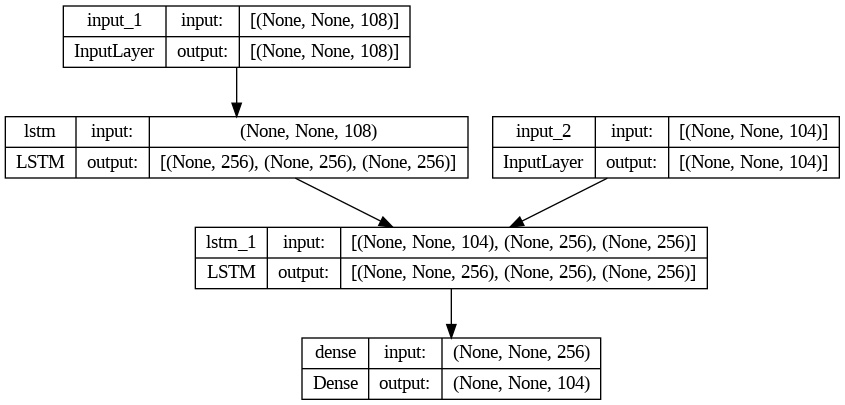

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png', show_shapes=True)

### Model training

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ["accuracy"])
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

Epoch 1/50
117/117 [==============================] - 16s 70ms/step - loss: 0.9636 - accuracy: 0.8302 - val_loss: 0.6655 - val_accuracy: 0.8392
Epoch 2/50
117/117 [==============================] - 6s 48ms/step - loss: 0.6479 - accuracy: 0.8385 - val_loss: 0.6306 - val_accuracy: 0.8398
Epoch 3/50
117/117 [==============================] - 6s 48ms/step - loss: 0.5942 - accuracy: 0.8392 - val_loss: 0.5617 - val_accuracy: 0.8402
Epoch 4/50
117/117 [==============================] - 5s 47ms/step - loss: 0.5546 - accuracy: 0.8402 - val_loss: 0.5473 - val_accuracy: 0.8426
Epoch 5/50
117/117 [==============================] - 6s 47ms/step - loss: 0.5375 - accuracy: 0.8459 - val_loss: 0.5248 - val_accuracy: 0.8502
Epoch 6/50
117/117 [==============================] - 6s 47ms/step - loss: 0.5134 - accuracy: 0.8570 - val_loss: 0.4974 - val_accuracy: 0.8596
Epoch 7/50
117/117 [==============================] - 5s 47ms/step - loss: 0.4868 - accuracy: 0.8606 - val_loss: 0.4795 - val_accuracy: 0.862

## Inference

In [ ]:
from tensorflow.keras.models import Model
from keras.layers import Input, LSTM, Dense

In [ ]:
# Manually deriving the decoder states and decoder outputs so that we can reuse decoder outputs as inputs for next step
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [ ]:
# Mapping between integers or indexes and characters.
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())

In [ ]:
target_token_index

{' ': 0,
 '_': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27,
 'µ': 28,
 'º': 29,
 'à': 30,
 'á': 31,
 'â': 32,
 'ã': 33,
 'å': 34,
 'æ': 35,
 'ç': 36,
 'è': 37,
 'é': 38,
 'ê': 39,
 'í': 40,
 'î': 41,
 'ñ': 42,
 'ò': 43,
 'ó': 44,
 'ô': 45,
 'ø': 46,
 'ù': 47,
 'ú': 48,
 'ý': 49,
 'ă': 50,
 'ć': 51,
 'č': 52,
 'ė': 53,
 'ę': 54,
 'ě': 55,
 'ğ': 56,
 'ı': 57,
 'ł': 58,
 'ń': 59,
 'ň': 60,
 'ō': 61,
 'ő': 62,
 'œ': 63,
 'ř': 64,
 'ş': 65,
 'š': 66,
 'ţ': 67,
 'ū': 68,
 'ž': 69,
 '̈': 70,
 'ί': 71,
 'α': 72,
 'β': 73,
 'γ': 74,
 'ε': 75,
 'ι': 76,
 'κ': 77,
 'λ': 78,
 'ν': 79,
 'ρ': 80,
 'τ': 81,
 'ϋ': 82,
 'а': 83,
 'в': 84,
 'г': 85,
 'д': 86,
 'е': 87,
 'з': 88,
 'и': 89,
 'й': 90,
 'к': 91,
 'н': 92,
 'р': 93,
 'с': 94,
 'т': 95,
 'ц': 96,
 'ч': 97,
 'ы': 98,
 'я': 99,
 'ђ': 100,

In [ ]:
# decoding the output sentence from output tokenized data
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # character of target sequence with the start character.
    target_seq[0, 0, 0] = 1.0
    #target_token_index["\t"]
    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ""
    i=0
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        i=i+1
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char
        #print(decoded_sentence)

        # Exit condition: either hit max length
        # or find stop character.
        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length or i==100:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # Update states
        states_value = [h, c]
    return decoded_sentence

In [ ]:
print(input_texts[0])
print(target_texts[0])

due price dimens use polic  hospit court stationeri evidenti devic 
 weg gross preis dien ausschliess stationar evidentialgerat polizei  krankenhaus behord  


In [ ]:
translate_dict = {}

for seq_index in range(5):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    translate_dict[input_texts[seq_index]] = decoded_sentence
    #print("Input sentence:", input_texts[seq_index])
    #print("Decoded sentence:", decoded_sentence)

1/1 [==============================] - 0s 22ms/step


In [ ]:
translate_dict

{'due price dimens use polic  hospit court stationeri evidenti devic ': 'die erst besteh  eingeschlag                                                                        ',
 'the locat cave  buda castl hill  uniqu world ': 'die erst besteh  eingeschlag                                                                        ',
 'descript design  outer form novelti well purpos thereof ': 'die erst besteh  eingeschlag                                                                        ',
 'mr presid  easi react emot hous react emot  react fact ': 'die erst besteh  eingeschlag                                                                        ',
 'he ask whether singl member state might request suspens whether done onethird member state ': 'die erst besteh  eingeschlag                                                                        '}